In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lem-tweet/lemmatized_tweets.csv
/kaggle/input/datadata1/BTC-USD (4) (3).csv
/kaggle/input/btc-data-4/BTC-USD (4).csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("/kaggle/input/lem-tweet/lemmatized_tweets.csv")

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,index,Date,text,Sentiment,counts
0,0,0,0,2019-05-27,appena uscito un nuovo video le cryptomonnaies...,Positive,1
1,1,1,1,2019-05-27,cardano digitize currency eos roi amp bitcoin ...,Positive,2
2,2,2,2,2019-05-27,another test tweet caught stream bitcoin,Positive,3
3,3,3,3,2019-05-27,current crypto price btc usd eth usd ltc usd b...,Positive,4
4,4,4,4,2019-05-27,spiv nosar baz bitcoin asset amp currency,Positive,5


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
vader = SentimentIntensityAnalyzer()

In [7]:
def get_sentiment_score(text):
    sentiment = vader.polarity_scores(text)
    return sentiment['compound']

In [8]:
from tqdm import tqdm

In [9]:
data['text'] = data['text'].astype(str)

In [10]:
data['sentiment_score'] = data['text'].apply(get_sentiment_score)

In [11]:
data

,Unnamed: 0.1,Unnamed: 0,index,Date,text,Sentiment,counts,sentiment_score
0,0,0,0,2019-05-27,appena uscito un nuovo video le cryptomonnaies...,Positive,1,0.0000
1,1,1,1,2019-05-27,cardano digitize currency eos roi amp bitcoin ...,Positive,2,-0.1027
2,2,2,2,2019-05-27,another test tweet caught stream bitcoin,Positive,3,0.0000
3,3,3,3,2019-05-27,current crypto price btc usd eth usd ltc usd b...,Positive,4,0.0000
4,4,4,4,2019-05-27,spiv nosar baz bitcoin asset amp currency,Positive,5,0.3612
...,...,...,...,...,...,...,...,...
468731,468731,474293,19340103,2019-11-23,xmr worth btc,Positive,246,0.2263
468732,468732,474294,19340104,2019-11-23,eurjpy usdjpy spx usdtry eurusd gbpusd usdjpy ...,Positive,247,0.0000
468733,468733,474295,19340105,2019-11-23,beautiful close yesterday weekly front ran clo...,Positive,248,0.8591
468734,468734,474296,19340106,2019-11-23,one bitcoin biggest holder moved btc worth mil...,Positive,249,0.2263


In [12]:
date = []
polarity = []

sumof = -100
count = 0

for i in range(468735):
    if data['Date'][i] == data['Date'][i+1]:
        sumof = max(sumof, data['sentiment_score'][i])
#         sumof += data['Polarity'][i]
#         count += 1
    
    else:
#         sumof = sumof/count
        date.append(data['Date'][i])
        polarity.append(sumof)
        sumof = 0
#         count = 0
        

In [13]:
df = pd.DataFrame({'Date': date, 'Polarity': polarity})

In [14]:
df

,Date,Polarity
0,2019-05-27,0.9313
1,2019-05-21,0.9643
2,2019-05-22,0.8860
3,2019-05-10,0.9246
4,2019-05-26,0.9788
...,...,...
1887,2019-11-18,0.9313
1888,2019-11-19,0.8689
1889,2019-11-20,0.8316
1890,2019-11-21,0.9081


In [15]:
sorted_df = df.sort_values(by='Date')

In [16]:
sorted_df

,Date,Polarity
1256,2014-09-18,0.7351
1257,2014-09-19,0.7010
550,2014-09-20,0.8860
549,2014-09-21,0.4404
1259,2014-09-22,0.5859
...,...,...
1887,2019-11-18,0.9313
1888,2019-11-19,0.8689
1889,2019-11-20,0.8316
1890,2019-11-21,0.9081


In [17]:
sorted_df = sorted_df.reset_index()

In [18]:
sorted_df.head(50)

,index,Date,Polarity
0,1256,2014-09-18,0.7351
1,1257,2014-09-19,0.7010
2,550,2014-09-20,0.8860
3,549,2014-09-21,0.4404
4,1259,2014-09-22,0.5859
5,1258,2014-09-23,0.6369
6,552,2014-09-24,0.8442
7,553,2014-09-25,0.7010
8,1260,2014-09-26,0.6486
9,551,2014-09-27,0.4404


In [19]:
sorted_df = sorted_df.drop('index', axis = 1)

In [20]:
sorted_df

,Date,Polarity
0,2014-09-18,0.7351
1,2014-09-19,0.7010
2,2014-09-20,0.8860
3,2014-09-21,0.4404
4,2014-09-22,0.5859
...,...,...
1887,2019-11-18,0.9313
1888,2019-11-19,0.8689
1889,2019-11-20,0.8316
1890,2019-11-21,0.9081


In [21]:
btc_data = pd.read_csv("/kaggle/input/datadata1/BTC-USD (4) (3).csv")

In [22]:
btc_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3097,2023-03-11,20187.876953,20792.525391,20068.660156,20632.410156,20632.410156,30180288176
3098,2023-03-12,20628.029297,22185.031250,20448.806641,22163.949219,22163.949219,29279035521
3099,2023-03-13,22156.406250,24550.837891,21918.199219,24197.533203,24197.533203,49466362688
3100,2023-03-14,24201.765625,26514.716797,24081.183594,24746.074219,24746.074219,54622230164


In [23]:
for i in range(1894,3102,1):
    btc_data = btc_data.drop(index = i)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)


In [25]:
btc_data.iloc[:, 1:5]

,Open,High,Low,Close
0,465.864014,468.174011,452.421997,457.334015
1,456.859985,456.859985,413.104004,424.440002
2,424.102997,427.834991,384.532013,394.795990
3,394.673004,423.295990,389.882996,408.903992
4,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
1889,8305.134766,8408.516602,8099.963379,8206.145508
1890,8203.613281,8237.240234,8010.511719,8027.268066
1891,8023.644531,8110.098145,7597.381836,7642.750000
1892,7643.569336,7697.382813,6936.706543,7296.577637


In [26]:
pca.fit(btc_data.iloc[:, 1:5])

PCA(n_components=1)

In [27]:
x_pca = pca.transform(btc_data.iloc[:, 1:5])

In [28]:
pca_df = pd.DataFrame(btc_data['Date'])

In [29]:
pca_df['pca'] = x_pca

In [30]:
pca_df

,Date,pca
0,2014-09-17,-6455.151675
1,2014-09-18,-6500.882317
2,2014-09-19,-6560.872875
3,2014-09-20,-6568.316548
4,2014-09-21,-6570.690162
...,...,...
1889,2019-11-19,9132.934366
1890,2019-11-20,8860.941926
1891,2019-11-21,8313.961997
1892,2019-11-22,7419.262696


In [31]:
price = []
for i in range(1892):
    for j in range(1894):
        if(pca_df['Date'][j] == sorted_df['Date'][i]):
            price.append(pca_df['pca'][j])
            

In [32]:
len(price)

1892

In [33]:
sorted_df['pca'] = price

In [34]:
sorted_df.head()

,Date,Polarity,pca
0,2014-09-18,0.7351,-6500.882317
1,2014-09-19,0.7010,-6560.872875
2,2014-09-20,0.8860,-6568.316548
3,2014-09-21,0.4404,-6570.690162
4,2014-09-22,0.5859,-6574.472292


In [35]:
import  matplotlib.pyplot as plt

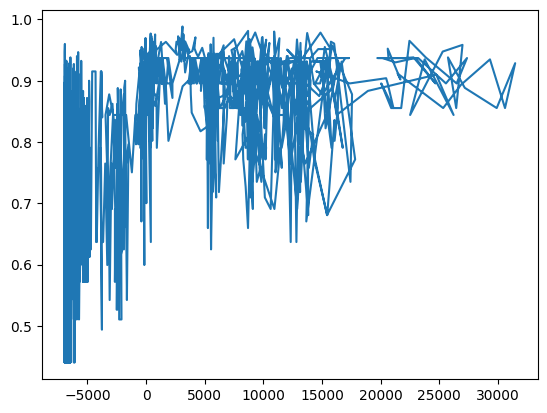

In [36]:
plt.plot(sorted_df['pca'], sorted_df['Polarity'])

In [37]:
x = sorted_df['pca']
y = sorted_df['Polarity']

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x =  scaler.fit_transform(np.array(x).reshape(-1,1))
y =  scaler.fit_transform(np.array(y).reshape(-1,1))

In [39]:
x

array([[0.01245741],
       [0.01089717],
       [0.01070357],
       ...,
       [0.41198823],
       [0.39776236],
       [0.37449299]])

In [40]:
y

array([[0.53757753],
       [0.47537395],
       [0.81284203],
       ...,
       [0.71360817],
       [0.85315578],
       [0.80809923]])

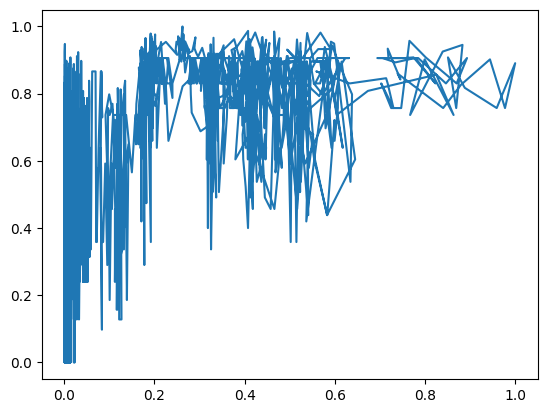

In [41]:
plt.plot(x,y)

In [42]:
x.shape

(1892, 1)

In [43]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [44]:
x.shape

(1892, 1, 1)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle = True)

In [47]:
x_train.shape

(1513, 1, 1)

In [48]:
x_test.shape

(379, 1, 1)

In [49]:
y_train.shape

(1513, 1)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [51]:
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape = (1,1)))
model.add(LSTM(75, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            40800     
                                                                 
 lstm_1 (LSTM)               (None, 1, 75)             52800     
                                                                 
 lstm_2 (LSTM)               (None, 50)                25200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 118,851
Trainable params: 118,851
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=200, batch_size=25, verbose=1)

Epoch 1/200
61/61 [==============================] - 11s 25ms/step - loss: 0.2005 - val_loss: 0.0488
Epoch 2/200
61/61 [==============================] - 1s 8ms/step - loss: 0.0485 - val_loss: 0.0458
Epoch 3/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0469 - val_loss: 0.0468
Epoch 4/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0466 - val_loss: 0.0469
Epoch 5/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0460 - val_loss: 0.0455
Epoch 6/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0455 - val_loss: 0.0451
Epoch 7/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0450 - val_loss: 0.0446
Epoch 8/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0445 - val_loss: 0.0425
Epoch 9/200
61/61 [==============================] - 1s 9ms/step - loss: 0.0435 - val_loss: 0.0425
Epoch 10/200
61/61 [==============================] - 1s 11ms/step - loss: 0.0423 - val_loss: 0.0425
Epoch 

In [54]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

12/12 [==============================] - 0s 3ms/step


In [55]:
import math
from sklearn.metrics import mean_squared_error

In [56]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.1847699578135335

In [57]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.18122919103516177

In [58]:
polarity_imputed = pd.DataFrame({'Date': btc_data['Date']})

In [59]:
polarity_imputed

,Date
0,2014-09-17
1,2014-09-18
2,2014-09-19
3,2014-09-20
4,2014-09-21
...,...
1889,2019-11-19
1890,2019-11-20
1891,2019-11-21
1892,2019-11-22


In [60]:
polarity_imputed['Polarity'] = np.nan

In [61]:
polarity_imputed

,Date,Polarity
0,2014-09-17,NaN
1,2014-09-18,NaN
2,2014-09-19,NaN
3,2014-09-20,NaN
4,2014-09-21,NaN
...,...,...
1889,2019-11-19,NaN
1890,2019-11-20,NaN
1891,2019-11-21,NaN
1892,2019-11-22,NaN


In [62]:
for i in range(1894):
    for j in range(1892):
        if polarity_imputed['Date'][i] == sorted_df['Date'][j]:
            polarity_imputed['Polarity'][i] = sorted_df['Polarity'][j]

/tmp/ipykernel_31/417148334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_imputed['Polarity'][i] = sorted_df['Polarity'][j]


In [63]:
polarity_imputed

,Date,Polarity
0,2014-09-17,NaN
1,2014-09-18,0.7351
2,2014-09-19,0.7010
3,2014-09-20,0.8860
4,2014-09-21,0.4404
...,...,...
1889,2019-11-19,0.8689
1890,2019-11-20,0.8316
1891,2019-11-21,0.9081
1892,2019-11-22,0.8834


In [64]:
polarity_imputed['Close'] = pca_df['pca']

In [65]:
polarity_imputed

,Date,Polarity,Close
0,2014-09-17,NaN,-6455.151675
1,2014-09-18,0.7351,-6500.882317
2,2014-09-19,0.7010,-6560.872875
3,2014-09-20,0.8860,-6568.316548
4,2014-09-21,0.4404,-6570.690162
...,...,...,...
1889,2019-11-19,0.8689,9132.934366
1890,2019-11-20,0.8316,8860.941926
1891,2019-11-21,0.9081,8313.961997
1892,2019-11-22,0.8834,7419.262696


In [66]:
arr = []
arr.append(polarity_imputed['Close'][0])
arr.append(polarity_imputed['Close'][1893])

In [67]:
arr

[-6455.151674501615, 7267.265585071364]

In [68]:
arr = np.array(arr)

In [69]:
arr.reshape(-1,1)

array([[-6455.1516745 ],
       [ 7267.26558507]])

In [70]:
arr = arr.reshape(arr.shape[0], 1, 1)

In [71]:
arr.shape

(2, 1, 1)

In [72]:
predicted = model.predict(arr)

1/1 [==============================] - 0s 21ms/step


In [73]:
predicted

array([[0.43653327],
       [0.35612085]], dtype=float32)

In [74]:
polarity_imputed['Polarity'][0] = predicted[0]
polarity_imputed['Polarity'][1893] = predicted[1]


/tmp/ipykernel_31/2319400452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_imputed['Polarity'][0] = predicted[0]
/tmp/ipykernel_31/2319400452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_imputed['Polarity'][1893] = predicted[1]


In [75]:
polarity_imputed

,Date,Polarity,Close
0,2014-09-17,0.436533,-6455.151675
1,2014-09-18,0.735100,-6500.882317
2,2014-09-19,0.701000,-6560.872875
3,2014-09-20,0.886000,-6568.316548
4,2014-09-21,0.440400,-6570.690162
...,...,...,...
1889,2019-11-19,0.868900,9132.934366
1890,2019-11-20,0.831600,8860.941926
1891,2019-11-21,0.908100,8313.961997
1892,2019-11-22,0.883400,7419.262696


In [76]:
polarity_imputed.isna().sum().sum()

0

In [77]:
df = polarity_imputed['Close']

In [78]:
df.head()

0   -6455.151675
1   -6500.882317
2   -6560.872875
3   -6568.316548
4   -6570.690162
Name: Close, dtype: float64

In [79]:
bit_data = []
for i in range(10):
    bit_data.append(df[i])
    
for i in range(10,len(df)):
    sumof = 0
    for j in range(1,11,1):
        sumof += df[i-j]
    bit_data.append(sumof/10)

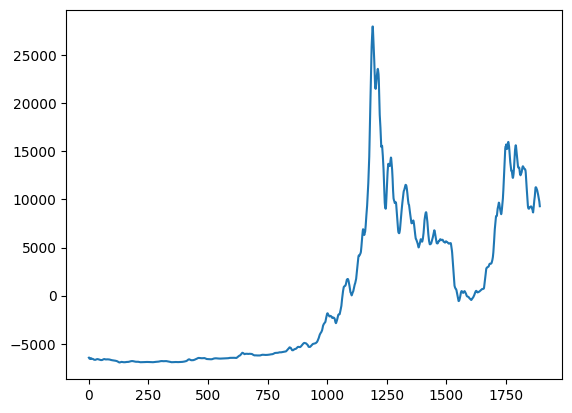

In [80]:
plt.plot(bit_data)

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
bit_data =  scaler.fit_transform(np.array(bit_data).reshape(-1,1))
bit_data =  scaler.fit_transform(np.array(df).reshape(-1,1))

In [82]:
bit_data

array([[0.01364677],
       [0.01245741],
       [0.01089717],
       ...,
       [0.39776236],
       [0.37449299],
       [0.37053984]])

In [83]:
bit_data.shape

(1894, 1)

In [84]:
# splitting the data set into train and test data
training_size = int(len(bit_data)*0.80)
test_size = len(bit_data) - training_size
train_data, test_data = bit_data[:training_size,:], bit_data[training_size:len(bit_data),:1]

In [85]:
# creating data set for LSTM model, for each output data the 100 days back prices are considered as features
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [86]:
time_step = 50
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [87]:
x_train

array([[0.01364677, 0.01245741, 0.01089717, ..., 0.00673791, 0.00676177,
        0.00715094],
       [0.01245741, 0.01089717, 0.01070357, ..., 0.00676177, 0.00715094,
        0.00761876],
       [0.01089717, 0.01070357, 0.01064184, ..., 0.00715094, 0.00761876,
        0.00770287],
       ...,
       [0.32250432, 0.31864515, 0.32033141, ..., 0.3210709 , 0.32022955,
        0.32287306],
       [0.31864515, 0.32033141, 0.32569308, ..., 0.32022955, 0.32287306,
        0.32464719],
       [0.32033141, 0.32569308, 0.33481595, ..., 0.32287306, 0.32464719,
        0.32794898]])

In [88]:
x_train.shape

(1464, 50)

In [89]:
y_train.shape

(1464,)

In [90]:
x_test.shape

(328, 50)

In [91]:
# converting the data into 3-D data by reshaping it to feed it into LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [92]:
model = Sequential()
model.add(LSTM(256, return_sequences = True, input_shape = (50,1)))
model.add(LSTM(128, return_sequences = True))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 256)           264192    
                                                                 
 lstm_4 (LSTM)               (None, 50, 128)           197120    
                                                                 
 lstm_5 (LSTM)               (None, 50, 64)            49408     
                                                                 
 lstm_6 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 523,169
Trainable params: 523,169
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=25, verbose=1)

Epoch 1/100
59/59 [==============================] - 10s 42ms/step - loss: 0.0050 - val_loss: 0.0024
Epoch 2/100
59/59 [==============================] - 1s 21ms/step - loss: 0.0022 - val_loss: 0.0044
Epoch 3/100
59/59 [==============================] - 1s 20ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4/100
59/59 [==============================] - 1s 20ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/100
59/59 [==============================] - 1s 20ms/step - loss: 9.5950e-04 - val_loss: 0.0015
Epoch 6/100
59/59 [==============================] - 1s 20ms/step - loss: 9.3369e-04 - val_loss: 0.0010
Epoch 7/100
59/59 [==============================] - 1s 24ms/step - loss: 8.0085e-04 - val_loss: 0.0014
Epoch 8/100
59/59 [==============================] - 1s 20ms/step - loss: 7.2585e-04 - val_loss: 0.0037
Epoch 9/100
59/59 [==============================] - 1s 20ms/step - loss: 7.5985e-04 - val_loss: 0.0012
Epoch 10/100
59/59 [==============================] - 1s 20ms/step - loss: 6.79

In [95]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 6ms/step


In [96]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.01138778077074918

In [97]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.014458456742288298

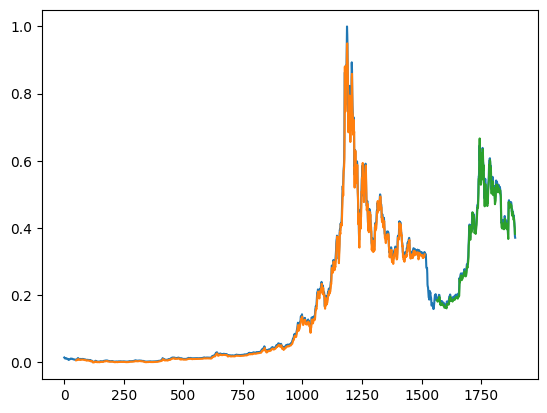

In [98]:
# plotting train predictions
look_back = 50
train_predict_plot = np.empty_like(bit_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back : len(train_predict)+look_back, :] = train_predict
# plotting test predictions
test_predict_plot = np.empty_like(bit_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1 : len(df)-1, :] = test_predict
# plotting baselines and predictions
plt.plot(bit_data)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [99]:
X_train = []
for i in range(1464):
    X = np.append(x_train[i], polarity_imputed['Polarity'][i])
    X_train.append(X)
    

In [100]:
X_test = []
for i in range(328):
    X = np.append(x_test[i], polarity_imputed['Polarity'][i+1464])
    X_test.append(X)

In [101]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [102]:
X_train.shape

(1464, 51)

In [103]:
X_test.shape

(328, 51)

In [104]:
# converting the data into 3-D data by reshaping it to feed it into LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [105]:
model = Sequential()
model.add(LSTM(256, return_sequences = True, input_shape = (51,1)))
model.add(LSTM(128, return_sequences = True))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [106]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 51, 256)           264192    
                                                                 
 lstm_8 (LSTM)               (None, 51, 128)           197120    
                                                                 
 lstm_9 (LSTM)               (None, 51, 64)            49408     
                                                                 
 lstm_10 (LSTM)              (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 523,169
Trainable params: 523,169
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=25, verbose=1)

Epoch 1/100
59/59 [==============================] - 9s 43ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 2/100
59/59 [==============================] - 1s 20ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 3/100
59/59 [==============================] - 1s 20ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/100
59/59 [==============================] - 1s 21ms/step - loss: 8.8728e-04 - val_loss: 0.0011
Epoch 5/100
59/59 [==============================] - 1s 21ms/step - loss: 9.6393e-04 - val_loss: 8.8452e-04
Epoch 6/100
59/59 [==============================] - 1s 20ms/step - loss: 7.9799e-04 - val_loss: 0.0041
Epoch 7/100
59/59 [==============================] - 1s 22ms/step - loss: 0.0011 - val_loss: 8.4530e-04
Epoch 8/100
59/59 [==============================] - 1s 20ms/step - loss: 8.6435e-04 - val_loss: 0.0013
Epoch 9/100
59/59 [==============================] - 1s 20ms/step - loss: 5.8498e-04 - val_loss: 8.6067e-04
Epoch 10/100
59/59 [==============================] - 1s 20ms/step -

In [108]:
train_predict1 = model.predict(X_train)
test_predict1 = model.predict(X_test)

11/11 [==============================] - 0s 6ms/step


In [109]:
math.sqrt(mean_squared_error(y_train, train_predict1))

0.009390082711331018

In [110]:
math.sqrt(mean_squared_error(y_test, test_predict1))

0.015165293563207135

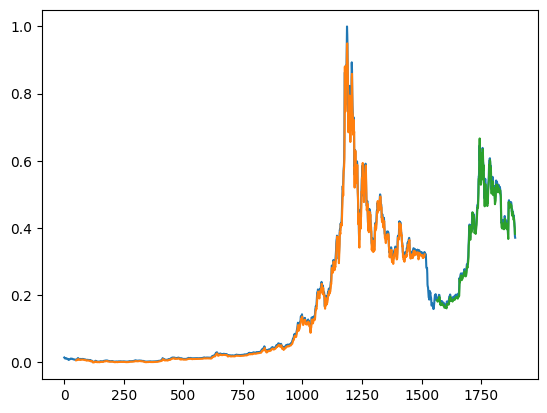

In [111]:
# plotting train predictions
look_back = 50
train_predict_plot = np.empty_like(bit_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back : len(train_predict)+look_back, :] = train_predict
# plotting test predictions
test_predict_plot = np.empty_like(bit_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1 : len(df)-1, :] = test_predict
# plotting baselines and predictions
plt.plot(bit_data)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()